In [1]:
import os

import gym
import gym_electricitymarket
import gym_gridworld
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines.common.policies import MlpPolicy, FeedForwardPolicy
from stable_baselines import results_plotter
from stable_baselines import *

/Users/kady/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kady/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kady/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kady/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [6]:
import gym
import numpy as np

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Customize value network 
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[dict(vf=[10, 7, 5])],
                                           feature_extraction="mlp")
        
# Create and wrap the environment
env = gym.make('ElectricityMarket-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

model = TRPO(MlpPolicy, env, verbose=1)

# Train the agent
time_steps = 500000
model.learn(total_timesteps=time_steps)

********** Iteration 0 ************
Optimizing Policy...
sampling
done in 0.483 seconds
computegrad
done in 0.128 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       0.21          0
         1    0.00686     0.0137
         2    0.00193     0.0578
         3   0.000482      0.247
         4   0.000315      0.248
         5   2.91e-05       0.49
         6    0.00432        0.5
         7   1.34e-05      0.602
         8   5.02e-05      0.608
         9   9.95e-06       0.62
        10   0.000207      0.621
done in 0.250 seconds
Expected: 0.022 Actual: 0.010
Stepsize OK!
vf
done in 0.060 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.7e+03    |
| EpThisIter              | 42          |
| EpisodesSoFar           | 42          |
| TimeElapsed             | 1.01        |
| TimestepsSoFar          | 1024        |
| entloss                 | 0.0         |
| entropy                 | 4.2292

********** Iteration 5 ************
Optimizing Policy...
sampling
done in 0.373 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0     0.0145          0
         1     0.0223    0.00732
         2     0.0311     0.0381
         3    0.00239     0.0441
         4     0.0136     0.0537
         5    0.00118     0.0668
         6   0.000589      0.112
         7    0.00222       0.17
         8   0.000685      0.172
         9    0.00845      0.442
        10   0.000418      0.456
done in 0.013 seconds
Expected: 0.016 Actual: 0.004
violated KL constraint. shrinking step.
Expected: 0.016 Actual: 0.003
violated KL constraint. shrinking step.
Expected: 0.016 Actual: 0.002
Stepsize OK!
vf
done in 0.016 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -2.76e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 256          |
| TimeElapsed  

********** Iteration 11 ************
Optimizing Policy...
sampling
done in 0.333 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.166          0
         1     0.0277    0.00973
         2     0.0293     0.0165
         3     0.0047     0.0285
         4     0.0212     0.0371
         5    0.00183     0.0702
         6    0.00144      0.144
         7   0.000688      0.389
         8   0.000814       0.39
         9    0.00793      0.585
        10   0.000234      0.597
done in 0.013 seconds
Expected: 0.022 Actual: -0.032
violated KL constraint. shrinking step.
Expected: 0.022 Actual: -0.011
violated KL constraint. shrinking step.
Expected: 0.022 Actual: 0.002
Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -2.74e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 512          |
| TimeElapse

********** Iteration 17 ************
Optimizing Policy...
sampling
done in 0.319 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.329          0
         1     0.0199     0.0109
         2     0.0765     0.0307
         3     0.0111     0.0473
         4     0.0373     0.0735
         5   0.000587     0.0936
         6   0.000404      0.103
         7    0.00581      0.172
         8   0.000379      0.178
         9    0.00508      0.184
        10   0.000452      0.281
done in 0.013 seconds
Expected: 0.020 Actual: 0.022
violated KL constraint. shrinking step.
Expected: 0.020 Actual: 0.011
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.75e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 768         |
| TimeElapsed             | 7.55        |
| TimestepsSoFar          | 18432       |
| ent

Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.7e+03    |
| EpThisIter              | 43          |
| EpisodesSoFar           | 1024        |
| TimeElapsed             | 9.81        |
| TimestepsSoFar          | 24576       |
| entloss                 | 0.0         |
| entropy                 | 4.396031    |
| explained_variance_t... | -0.000435   |
| meankl                  | 0.009902624 |
| optimgain               | 0.01685053  |
| surrgain                | 0.01685053  |
-----------------------------------------
********** Iteration 24 ************
Optimizing Policy...
sampling
done in 0.328 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       0.16          0
         1      0.067    0.00301
         2    0.00895    0.00821
         3       0.02     0.0172
         4     0.0057     0.0295
         5    0.00567     0.057

********** Iteration 30 ************
Optimizing Policy...
sampling
done in 0.321 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       2.09          0
         1    0.00419    0.00296
         2    0.00613    0.00552
         3     0.0074     0.0366
         4      0.011     0.0505
         5    0.00256     0.0512
         6     0.0136     0.0641
         7   0.000392      0.157
         8      0.323      0.193
         9   0.000145      0.308
        10    0.00342      0.427
done in 0.013 seconds
Expected: 0.018 Actual: 0.012
Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.64e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 1322        |
| TimeElapsed             | 12.5        |
| TimestepsSoFar          | 31744       |
| entloss                 | 0.0         |
| entropy                 | 4.390

violated KL constraint. shrinking step.
Expected: 0.023 Actual: 0.015
Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -2.66e+03    |
| EpThisIter              | 42           |
| EpisodesSoFar           | 1578         |
| TimeElapsed             | 14.7         |
| TimestepsSoFar          | 37888        |
| entloss                 | 0.0          |
| entropy                 | 4.338616     |
| explained_variance_t... | -0.00022     |
| meankl                  | 0.0064120153 |
| optimgain               | 0.015191233  |
| surrgain                | 0.015191233  |
------------------------------------------
********** Iteration 37 ************
Optimizing Policy...
sampling
done in 0.331 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.343          0
         1     0.0509   0.000932
         2    0.00563    0.00652
         3   

********** Iteration 43 ************
Optimizing Policy...
sampling
done in 0.363 seconds
computegrad
done in 0.004 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       0.44          0
         1     0.0187    0.00198
         2     0.0156    0.00785
         3     0.0101     0.0837
         4    0.00593     0.0957
         5      0.062     0.0982
         6     0.0188      0.151
         7   0.000963      0.163
         8   0.000764      0.236
         9   0.000527      0.236
        10   0.000754      0.401
done in 0.017 seconds
Expected: 0.021 Actual: 0.017
Stepsize OK!
vf
done in 0.019 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.66e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 1877        |
| TimeElapsed             | 17.4        |
| TimestepsSoFar          | 45056       |
| entloss                 | 0.0         |
| entropy                 | 4.324

Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -2.64e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 2133         |
| TimeElapsed             | 19.8         |
| TimestepsSoFar          | 51200        |
| entloss                 | 0.0          |
| entropy                 | 4.5495872    |
| explained_variance_t... | -0.000106    |
| meankl                  | 0.011414124  |
| optimgain               | 0.0145517625 |
| surrgain                | 0.0145517625 |
------------------------------------------
********** Iteration 50 ************
Optimizing Policy...
sampling
done in 0.320 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.211          0
         1      0.186    0.00113
         2     0.0046     0.0116
         3     0.0261     0.0307
         4      0.002      0.083
         5     0.

********** Iteration 56 ************
Optimizing Policy...
sampling
done in 0.366 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       0.55          0
         1      0.715    0.00441
         2       0.03     0.0212
         3     0.0765     0.0456
         4     0.0088      0.106
         5     0.0263       0.11
         6     0.0131      0.111
         7    0.00226      0.227
         8   0.000927       0.33
         9   0.000317       0.33
        10    0.00709      0.342
done in 0.014 seconds
Expected: 0.030 Actual: 0.033
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.57e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 2432        |
| TimeElapsed             | 22.6        |
| TimestepsSoFar          | 58368       |
| entloss                 | 0.0         |
| entropy                 | 4.538

Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.44e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 2688        |
| TimeElapsed             | 24.8        |
| TimestepsSoFar          | 64512       |
| entloss                 | 0.0         |
| entropy                 | 4.5698237   |
| explained_variance_t... | -7.51e-05   |
| meankl                  | 0.010753859 |
| optimgain               | 0.01685853  |
| surrgain                | 0.01685853  |
-----------------------------------------
********** Iteration 63 ************
Optimizing Policy...
sampling
done in 0.330 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       2.81          0
         1     0.0498    0.00416
         2    0.00467     0.0104
         3     0.0272     0.0235
         4     0.0136     0.0681
         5    0.00344     0.068

********** Iteration 69 ************
Optimizing Policy...
sampling
done in 0.351 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.331          0
         1      0.481    0.00868
         2     0.0218     0.0144
         3    0.00508     0.0166
         4    0.00989     0.0494
         5    0.00294     0.0565
         6     0.0122     0.0573
         7   0.000185      0.351
         8    0.00147       0.37
         9   0.000419       0.37
        10   7.11e-05      0.371
done in 0.014 seconds
Expected: 0.022 Actual: 0.022
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.32e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 2986        |
| TimeElapsed             | 27.5        |
| TimestepsSoFar          | 71680       |
| entloss                 | 0.0         |
| entropy                 | 4.495

Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.34e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 3242        |
| TimeElapsed             | 29.7        |
| TimestepsSoFar          | 77824       |
| entloss                 | 0.0         |
| entropy                 | 4.489448    |
| explained_variance_t... | -4.49e-05   |
| meankl                  | 0.008441208 |
| optimgain               | 0.02186597  |
| surrgain                | 0.02186597  |
-----------------------------------------
********** Iteration 76 ************
Optimizing Policy...
sampling
done in 0.327 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.326          0
         1      0.152    0.00418
         2     0.0297     0.0126
         3     0.0232     0.0167
         4     0.0105     0.0597
         5   0.000494     0.063

********** Iteration 82 ************
Optimizing Policy...
sampling
done in 0.326 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.206          0
         1      0.222    0.00418
         2     0.0162     0.0132
         3      0.008      0.015
         4    0.00443     0.0423
         5   0.000274     0.0441
         6     0.0999     0.0623
         7   0.000142      0.126
         8   0.000234      0.212
         9   9.11e-05      0.212
        10   0.000207      0.213
done in 0.014 seconds
Expected: 0.015 Actual: 0.015
Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.32e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 3541        |
| TimeElapsed             | 32.4        |
| TimestepsSoFar          | 84992       |
| entloss                 | 0.0         |
| entropy                 | 4.398

Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.37e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 3797        |
| TimeElapsed             | 34.6        |
| TimestepsSoFar          | 91136       |
| entloss                 | 0.0         |
| entropy                 | 4.441005    |
| explained_variance_t... | -2.79e-05   |
| meankl                  | 0.011215632 |
| optimgain               | 0.020851193 |
| surrgain                | 0.020851193 |
-----------------------------------------
********** Iteration 89 ************
Optimizing Policy...
sampling
done in 0.317 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       1.03          0
         1      0.303    0.00233
         2     0.0387     0.0163
         3     0.0129     0.0192
         4     0.0246     0.0248
         5     0.0394     0.060

********** Iteration 95 ************
Optimizing Policy...
sampling
done in 0.321 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.133          0
         1     0.0924   0.000786
         2     0.0299     0.0129
         3     0.0204     0.0164
         4    0.00345     0.0766
         5    0.00294     0.0778
         6    0.00374     0.0779
         7   0.000774     0.0994
         8   0.000147      0.143
         9    0.00297      0.143
        10    0.00222      0.144
done in 0.013 seconds
Expected: 0.016 Actual: 0.016
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.34e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 4096        |
| TimeElapsed             | 37.2        |
| TimestepsSoFar          | 98304       |
| entloss                 | 0.0         |
| entropy                 | 4.495

Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.27e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 4352        |
| TimeElapsed             | 39.4        |
| TimestepsSoFar          | 104448      |
| entloss                 | 0.0         |
| entropy                 | 4.3511357   |
| explained_variance_t... | -2.07e-05   |
| meankl                  | 0.009356909 |
| optimgain               | 0.0129552   |
| surrgain                | 0.0129552   |
-----------------------------------------
********** Iteration 102 ************
Optimizing Policy...
sampling
done in 0.316 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.225          0
         1     0.0138   0.000921
         2     0.0228    0.00638
         3     0.0461     0.0282
         4     0.0361     0.0587
         5    0.00502     0.07

********** Iteration 108 ************
Optimizing Policy...
sampling
done in 0.324 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0     0.0744          0
         1      0.049    0.00532
         2     0.0128    0.00581
         3     0.0274     0.0108
         4     0.0222     0.0509
         5    0.00209     0.0711
         6      0.116     0.0746
         7   0.000566      0.114
         8    0.00037      0.159
         9     0.0142       0.16
        10     0.0182      0.178
done in 0.013 seconds
Expected: 0.015 Actual: 0.016
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.18e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 4650        |
| TimeElapsed             | 42          |
| TimestepsSoFar          | 111616      |
| entloss                 | 0.0         |
| entropy                 | 4.41

Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.13e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 4906        |
| TimeElapsed             | 44.2        |
| TimestepsSoFar          | 117760      |
| entloss                 | 0.0         |
| entropy                 | 4.39938     |
| explained_variance_t... | -1.59e-05   |
| meankl                  | 0.009755161 |
| optimgain               | 0.015111005 |
| surrgain                | 0.015111005 |
-----------------------------------------
********** Iteration 115 ************
Optimizing Policy...
sampling
done in 0.320 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.212          0
         1      0.133     0.0157
         2     0.0235     0.0237
         3     0.0852     0.0251
         4     0.0823     0.0658
         5    0.00305     0.08

********** Iteration 121 ************
Optimizing Policy...
sampling
done in 0.319 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0        1.4          0
         1     0.0619    0.00513
         2     0.0169    0.00677
         3     0.0108     0.0116
         4     0.0268     0.0279
         5    0.00325     0.0656
         6      0.343     0.0901
         7    0.00424      0.907
         8      0.154      0.958
         9   0.000557       1.12
        10    0.00507       1.12
done in 0.013 seconds
Expected: 0.034 Actual: 0.053
Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -2.01e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 5205        |
| TimeElapsed             | 46.8        |
| TimestepsSoFar          | 124928      |
| entloss                 | 0.0         |
| entropy                 | 4.43

Optimizing Policy...
sampling
done in 0.322 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.239          0
         1      0.142    0.00346
         2     0.0161    0.00814
         3    0.00557    0.00963
         4     0.0165     0.0268
         5     0.0018     0.0613
         6    0.00376      0.125
         7    0.00111      0.125
         8    0.00425      0.221
         9    0.00399      0.225
        10     0.0209      0.531
done in 0.013 seconds
Expected: 0.020 Actual: 0.016
violated KL constraint. shrinking step.
Expected: 0.020 Actual: 0.008
Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -1.98e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 5461         |
| TimeElapsed             | 49           |
| TimestepsSoFar          | 131072       |
| entloss                 | 0.0    

violated KL constraint. shrinking step.
Expected: 0.023 Actual: 0.031
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.95e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 5717        |
| TimeElapsed             | 51.2        |
| TimestepsSoFar          | 137216      |
| entloss                 | 0.0         |
| entropy                 | 4.3907256   |
| explained_variance_t... | -1.13e-05   |
| meankl                  | 0.003284774 |
| optimgain               | 0.03086672  |
| surrgain                | 0.03086672  |
-----------------------------------------
********** Iteration 134 ************
Optimizing Policy...
sampling
done in 0.340 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.572          0
         1      0.172    0.00537
         2     0.0279    0.00784
         3     0.0473     

********** Iteration 140 ************
Optimizing Policy...
sampling
done in 0.316 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.132          0
         1    0.00859    0.00643
         2     0.0184    0.00698
         3      0.011     0.0138
         4    0.00397     0.0287
         5     0.0366      0.081
         6    0.00441      0.124
         7      0.188      0.213
         8   0.000694      0.243
         9     0.0378      0.267
        10   0.000355      0.372
done in 0.013 seconds
Expected: 0.019 Actual: 0.013
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.92e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 6016        |
| TimeElapsed             | 53.8        |
| TimestepsSoFar          | 144384      |
| entloss                 | 0.0         |
| entropy                 | 4.27

violated KL constraint. shrinking step.
Expected: 0.020 Actual: 0.001
Stepsize OK!
vf
done in 0.017 seconds
-------------------------------------------
| EpLenMean               | 24            |
| EpRewMean               | -1.99e+03     |
| EpThisIter              | 43            |
| EpisodesSoFar           | 6272          |
| TimeElapsed             | 56            |
| TimestepsSoFar          | 150528        |
| entloss                 | 0.0           |
| entropy                 | 4.352452      |
| explained_variance_t... | -9.66e-06     |
| meankl                  | 0.011603739   |
| optimgain               | 0.00089884736 |
| surrgain                | 0.00089884736 |
-------------------------------------------
********** Iteration 147 ************
Optimizing Policy...
sampling
done in 0.325 seconds
computegrad
done in 0.004 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.132          0
         1      0.109    0.00338
         2     0.0161     0.011

Expected: 0.018 Actual: 0.015
Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -1.95e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 6528         |
| TimeElapsed             | 58.2         |
| TimestepsSoFar          | 156672       |
| entloss                 | 0.0          |
| entropy                 | 4.4561176    |
| explained_variance_t... | -8.7e-06     |
| meankl                  | 0.0053186147 |
| optimgain               | 0.014569089  |
| surrgain                | 0.014569089  |
------------------------------------------
********** Iteration 153 ************
Optimizing Policy...
sampling
done in 0.348 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.388          0
         1     0.0555    0.00281
         2    0.00476    0.00747
         3     0.0058    0.00937
         4    0.001

********** Iteration 159 ************
Optimizing Policy...
sampling
done in 0.328 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.325          0
         1     0.0958    0.00438
         2     0.0124    0.00713
         3    0.00379     0.0104
         4    0.00942     0.0194
         5   0.000775     0.0383
         6      0.336      0.158
         7   9.58e-05      0.298
         8    0.00395      0.303
         9   7.67e-05      0.308
        10    0.00651       0.31
done in 0.013 seconds
Expected: 0.016 Actual: 0.011
violated KL constraint. shrinking step.
Expected: 0.016 Actual: 0.006
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.96e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 6826        |
| TimeElapsed             | 60.8        |
| TimestepsSoFar          | 163840      |
| en

Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.88e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 7082        |
| TimeElapsed             | 63.1        |
| TimestepsSoFar          | 169984      |
| entloss                 | 0.0         |
| entropy                 | 4.6982675   |
| explained_variance_t... | -7.03e-06   |
| meankl                  | 0.014808639 |
| optimgain               | 0.013953887 |
| surrgain                | 0.013953887 |
-----------------------------------------
********** Iteration 166 ************
Optimizing Policy...
sampling
done in 0.320 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.672          0
         1     0.0987    0.00289
         2     0.0679     0.0052
         3    0.00499      0.012
         4    0.00352      0.015
         5   0.000536     0.03

********** Iteration 172 ************
Optimizing Policy...
sampling
done in 0.338 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.584          0
         1      0.107    0.00237
         2      0.109     0.0103
         3     0.0272     0.0138
         4    0.00963     0.0732
         5   0.000916     0.0788
         6     0.0118     0.0791
         7   0.000211     0.0936
         8     0.0192      0.102
         9   3.34e-05      0.109
        10   0.000548      0.109
done in 0.013 seconds
Expected: 0.018 Actual: 0.020
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.75e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 7381        |
| TimeElapsed             | 65.7        |
| TimestepsSoFar          | 177152      |
| entloss                 | 0.0         |
| entropy                 | 4.76

violated KL constraint. shrinking step.
Expected: 0.015 Actual: 0.009
Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -1.71e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 7637         |
| TimeElapsed             | 67.9         |
| TimestepsSoFar          | 183296       |
| entloss                 | 0.0          |
| entropy                 | 4.8139405    |
| explained_variance_t... | -5.84e-06    |
| meankl                  | 0.0027167294 |
| optimgain               | 0.0091435    |
| surrgain                | 0.0091435    |
------------------------------------------
********** Iteration 179 ************
Optimizing Policy...
sampling
done in 0.318 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.159          0
         1      0.117    0.00226
         2       0.13    0.00755
         3  

********** Iteration 185 ************
Optimizing Policy...
sampling
done in 0.325 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.452          0
         1      0.111    0.00312
         2      0.108    0.00661
         3    0.00439      0.019
         4    0.00591     0.0209
         5   0.000546     0.0415
         6     0.0457     0.0453
         7    0.00125      0.103
         8    0.00234      0.104
         9   0.000332      0.215
        10     0.0373      0.258
done in 0.016 seconds
Expected: 0.016 Actual: 0.012
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.69e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 7936        |
| TimeElapsed             | 70.4        |
| TimestepsSoFar          | 190464      |
| entloss                 | 0.0         |
| entropy                 | 4.77

********** Iteration 191 ************
Optimizing Policy...
sampling
done in 0.321 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       1.36          0
         1      0.458    0.00294
         2     0.0506    0.00485
         3     0.0321     0.0122
         4    0.00391     0.0181
         5     0.0119     0.0302
         6      0.275     0.0403
         7    0.00143     0.0651
         8     0.0301     0.0683
         9   0.000785      0.106
        10      0.168      0.156
done in 0.013 seconds
Expected: 0.017 Actual: 0.008
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.75e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 8192        |
| TimeElapsed             | 72.7        |
| TimestepsSoFar          | 196608      |
| entloss                 | 0.0         |
| entropy                 | 4.71

Stepsize OK!
vf
done in 0.017 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -1.79e+03    |
| EpThisIter              | 43           |
| EpisodesSoFar           | 8448         |
| TimeElapsed             | 74.9         |
| TimestepsSoFar          | 202752       |
| entloss                 | 0.0          |
| entropy                 | 4.6729374    |
| explained_variance_t... | -4.65e-06    |
| meankl                  | 0.0068585146 |
| optimgain               | 0.024605408  |
| surrgain                | 0.024605408  |
------------------------------------------
********** Iteration 198 ************
Optimizing Policy...
sampling
done in 0.320 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0     0.0898          0
         1     0.0385    0.00257
         2       0.12     0.0123
         3     0.0468     0.0157
         4     0.0113     0.0193
         5     0

********** Iteration 204 ************
Optimizing Policy...
sampling
done in 0.322 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.183          0
         1     0.0634    0.00337
         2     0.0211    0.00962
         3     0.0216     0.0101
         4     0.0232     0.0448
         5     0.0233     0.0557
         6     0.0017     0.0613
         7    0.00512      0.101
         8     0.0031      0.101
         9     0.0119      0.103
        10   0.000481      0.131
done in 0.013 seconds
Expected: 0.015 Actual: 0.016
violated KL constraint. shrinking step.
Expected: 0.015 Actual: 0.008
Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.78e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 8746        |
| TimeElapsed             | 77.5        |
| TimestepsSoFar          | 209920      |
| en

Stepsize OK!
vf
done in 0.049 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.84e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 9002        |
| TimeElapsed             | 79.7        |
| TimestepsSoFar          | 216064      |
| entloss                 | 0.0         |
| entropy                 | 4.6181083   |
| explained_variance_t... | -3.46e-06   |
| meankl                  | 0.008728796 |
| optimgain               | 0.016641356 |
| surrgain                | 0.016641356 |
-----------------------------------------
********** Iteration 211 ************
Optimizing Policy...
sampling
done in 0.377 seconds
computegrad
done in 0.004 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.425          0
         1      0.179    0.00179
         2     0.0849    0.00491
         3     0.0448     0.0117
         4     0.0637     0.0281
         5    0.00777      0.0

********** Iteration 217 ************
Optimizing Policy...
sampling
done in 0.385 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.709          0
         1     0.0629    0.00166
         2     0.0831    0.00538
         3     0.0681     0.0171
         4     0.0227     0.0873
         5     0.0329      0.102
         6      0.269      0.108
         7    0.00735      0.119
         8    0.00204      0.227
         9     0.0258       0.23
        10    0.00306      0.255
done in 0.017 seconds
Expected: 0.025 Actual: 0.022
Stepsize OK!
vf
done in 0.019 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.85e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 9301        |
| TimeElapsed             | 82.7        |
| TimestepsSoFar          | 223232      |
| entloss                 | 0.0         |
| entropy                 | 4.67

Stepsize OK!
vf
done in 0.025 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.93e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 9557        |
| TimeElapsed             | 85.4        |
| TimestepsSoFar          | 229376      |
| entloss                 | 0.0         |
| entropy                 | 4.711973    |
| explained_variance_t... | -2.74e-06   |
| meankl                  | 0.013638759 |
| optimgain               | 0.017899873 |
| surrgain                | 0.017899873 |
-----------------------------------------
********** Iteration 224 ************
Optimizing Policy...
sampling
done in 0.382 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.843          0
         1     0.0797    0.00271
         2     0.0471    0.00571
         3    0.00795    0.00912
         4     0.0347     0.0274
         5     0.0221     0.05

********** Iteration 230 ************
Optimizing Policy...
sampling
done in 0.340 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       1.95          0
         1     0.0539    0.00342
         2     0.0346     0.0111
         3     0.0261     0.0142
         4      0.032      0.024
         5     0.0179     0.0634
         6     0.0317      0.068
         7    0.00199     0.0691
         8   0.000727      0.135
         9     0.0106      0.201
        10    0.00157      0.202
done in 0.013 seconds
Expected: 0.020 Actual: 0.031
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.82e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 9856        |
| TimeElapsed             | 88.3        |
| TimestepsSoFar          | 236544      |
| entloss                 | 0.0         |
| entropy                 | 4.75

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.67e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 10112       |
| TimeElapsed             | 90.8        |
| TimestepsSoFar          | 242688      |
| entloss                 | 0.0         |
| entropy                 | 4.7163486   |
| explained_variance_t... | -2.86e-06   |
| meankl                  | 0.010670667 |
| optimgain               | 0.021504952 |
| surrgain                | 0.021504952 |
-----------------------------------------
********** Iteration 237 ************
Optimizing Policy...
sampling
done in 0.384 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.963          0
         1      0.119    0.00321
         2     0.0814     0.0135
         3     0.0502     0.0217
         4     0.0778     0.0403
         5      0.047       0.

********** Iteration 243 ************
Optimizing Policy...
sampling
done in 0.361 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.452          0
         1      0.315    0.00243
         2     0.0577     0.0242
         3     0.0278     0.0298
         4     0.0526      0.058
         5     0.0305      0.086
         6      0.115     0.0905
         7    0.00197     0.0944
         8   0.000969      0.128
         9    0.00602      0.228
        10   0.000834      0.228
done in 0.014 seconds
Expected: 0.024 Actual: 0.026
Stepsize OK!
vf
done in 0.020 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.58e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 10410       |
| TimeElapsed             | 93.7        |
| TimestepsSoFar          | 249856      |
| entloss                 | 0.0         |
| entropy                 | 4.66

violated KL constraint. shrinking step.
Expected: 0.034 Actual: 0.074
Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.54e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 10666       |
| TimeElapsed             | 96.1        |
| TimestepsSoFar          | 256000      |
| entloss                 | 0.0         |
| entropy                 | 4.7888603   |
| explained_variance_t... | -2.38e-06   |
| meankl                  | 0.013630616 |
| optimgain               | 0.07405182  |
| surrgain                | 0.07405182  |
-----------------------------------------
********** Iteration 250 ************
Optimizing Policy...
sampling
done in 0.344 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       0.96          0
         1     0.0314    0.00169
         2      0.035     0.0134
         3     0.0444     

********** Iteration 256 ************
Optimizing Policy...
sampling
done in 0.351 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.129          0
         1      0.832    0.00638
         2     0.0102     0.0105
         3    0.00669      0.013
         4     0.0103     0.0262
         5    0.00486     0.0433
         6    0.00454     0.0435
         7    0.00163      0.123
         8    0.00143      0.186
         9      0.219      0.195
        10   0.000688      0.279
done in 0.013 seconds
Expected: 0.017 Actual: 0.018
Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.48e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 10965       |
| TimeElapsed             | 98.9        |
| TimestepsSoFar          | 263168      |
| entloss                 | 0.0         |
| entropy                 | 4.75

Stepsize OK!
vf
done in 0.023 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.41e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 11221       |
| TimeElapsed             | 101         |
| TimestepsSoFar          | 269312      |
| entloss                 | 0.0         |
| entropy                 | 4.680766    |
| explained_variance_t... | -1.79e-06   |
| meankl                  | 0.010285307 |
| optimgain               | 0.012607036 |
| surrgain                | 0.012607036 |
-----------------------------------------
********** Iteration 263 ************
Optimizing Policy...
sampling
done in 0.348 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       5.06          0
         1     0.0624    0.00196
         2     0.0354     0.0115
         3     0.0738     0.0305
         4     0.0482     0.0744
         5       0.55     0.09

********** Iteration 269 ************
Optimizing Policy...
sampling
done in 0.346 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       2.39          0
         1     0.0405    0.00183
         2     0.0105    0.00699
         3     0.0335     0.0304
         4     0.0107     0.0513
         5     0.0395      0.052
         6    0.00143     0.0565
         7    0.00136     0.0749
         8     0.0496      0.104
         9   0.000343      0.106
        10   0.000613      0.155
done in 0.013 seconds
Expected: 0.015 Actual: 0.015
Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.2e+03    |
| EpThisIter              | 43          |
| EpisodesSoFar           | 11520       |
| TimeElapsed             | 104         |
| TimestepsSoFar          | 276480      |
| entloss                 | 0.0         |
| entropy                 | 4.72

Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.12e+03   |
| EpThisIter              | 43          |
| EpisodesSoFar           | 11776       |
| TimeElapsed             | 107         |
| TimestepsSoFar          | 282624      |
| entloss                 | 0.0         |
| entropy                 | 4.716436    |
| explained_variance_t... | -2.03e-06   |
| meankl                  | 0.009401674 |
| optimgain               | 0.021227896 |
| surrgain                | 0.021227896 |
-----------------------------------------
********** Iteration 276 ************
Optimizing Policy...
sampling
done in 0.347 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0        2.6          0
         1      0.175    0.00241
         2     0.0129     0.0106
         3     0.0465     0.0417
         4    0.00208     0.0597
         5     0.0152       0.

********** Iteration 282 ************
Optimizing Policy...
sampling
done in 0.342 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       1.54          0
         1      0.329    0.00228
         2      0.149    0.00828
         3     0.0191     0.0131
         4      0.012     0.0728
         5     0.0179      0.103
         6     0.0856      0.104
         7    0.00327      0.113
         8     0.0694      0.149
         9    0.00253      0.159
        10      0.524      0.179
done in 0.013 seconds
Expected: 0.022 Actual: 0.024
Stepsize OK!
vf
done in 0.023 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.08e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 12074       |
| TimeElapsed             | 109         |
| TimestepsSoFar          | 289792      |
| entloss                 | 0.0         |
| entropy                 | 4.71

Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -1.04e+03   |
| EpThisIter              | 42          |
| EpisodesSoFar           | 12330       |
| TimeElapsed             | 112         |
| TimestepsSoFar          | 295936      |
| entloss                 | 0.0         |
| entropy                 | 4.746741    |
| explained_variance_t... | -1.67e-06   |
| meankl                  | 0.010377272 |
| optimgain               | 0.018558666 |
| surrgain                | 0.018558666 |
-----------------------------------------
********** Iteration 289 ************
Optimizing Policy...
sampling
done in 0.367 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       2.67          0
         1       0.31    0.00357
         2     0.0162     0.0126
         3     0.0505     0.0225
         4       0.04     0.0534
         5    0.00756     0.07

********** Iteration 295 ************
Optimizing Policy...
sampling
done in 0.347 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.279          0
         1      0.837    0.00922
         2     0.0341     0.0141
         3    0.00692     0.0214
         4     0.0244     0.0263
         5    0.00578     0.0524
         6     0.0291     0.0535
         7    0.00128     0.0567
         8    0.00131      0.134
         9      0.438      0.189
        10    0.00145      0.258
done in 0.014 seconds
Expected: 0.019 Actual: 0.015
Stepsize OK!
vf
done in 0.024 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -970        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 12629       |
| TimeElapsed             | 114         |
| TimestepsSoFar          | 303104      |
| entloss                 | 0.0         |
| entropy                 | 4.71

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -894        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 12885       |
| TimeElapsed             | 117         |
| TimestepsSoFar          | 309248      |
| entloss                 | 0.0         |
| entropy                 | 4.725805    |
| explained_variance_t... | -1.55e-06   |
| meankl                  | 0.010708958 |
| optimgain               | 0.017008677 |
| surrgain                | 0.017008677 |
-----------------------------------------
********** Iteration 302 ************
Optimizing Policy...
sampling
done in 0.338 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       1.74          0
         1      0.152    0.00191
         2    0.00792     0.0097
         3     0.0175     0.0167
         4     0.0151     0.0299
         5      0.134      0.0

********** Iteration 308 ************
Optimizing Policy...
sampling
done in 0.350 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.832          0
         1       3.36     0.0103
         2     0.0449     0.0163
         3     0.0343      0.024
         4     0.0668     0.0447
         5     0.0458     0.0714
         6     0.0042     0.0718
         7    0.00106     0.0867
         8    0.00323      0.106
         9   0.000712      0.106
        10    0.00631       0.11
done in 0.014 seconds
Expected: 0.024 Actual: 0.023
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -718        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 13184       |
| TimeElapsed             | 120         |
| TimestepsSoFar          | 316416      |
| entloss                 | 0.0         |
| entropy                 | 4.61

violated KL constraint. shrinking step.
Expected: 0.024 Actual: 0.013
Stepsize OK!
vf
done in 0.023 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | -654         |
| EpThisIter              | 43           |
| EpisodesSoFar           | 13440        |
| TimeElapsed             | 122          |
| TimestepsSoFar          | 322560       |
| entloss                 | 0.0          |
| entropy                 | 4.6232843    |
| explained_variance_t... | -9.54e-07    |
| meankl                  | 0.0036960426 |
| optimgain               | 0.013120189  |
| surrgain                | 0.013120189  |
------------------------------------------
********** Iteration 315 ************
Optimizing Policy...
sampling
done in 0.352 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       3.29          0
         1        0.2    0.00121
         2     0.0247     0.0108
         3  

********** Iteration 321 ************
Optimizing Policy...
sampling
done in 0.340 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       1.38          0
         1      0.099    0.00087
         2       0.04    0.00851
         3      0.214     0.0437
         4     0.0127     0.0762
         5     0.0429     0.0765
         6    0.00467     0.0984
         7    0.00239      0.101
         8      0.654      0.111
         9    0.00129      0.129
        10    0.00143      0.142
done in 0.013 seconds
Expected: 0.020 Actual: 0.020
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -580        |
| EpThisIter              | 42          |
| EpisodesSoFar           | 13738       |
| TimeElapsed             | 125         |
| TimestepsSoFar          | 329728      |
| entloss                 | 0.0         |
| entropy                 | 4.50

Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -558        |
| EpThisIter              | 42          |
| EpisodesSoFar           | 13994       |
| TimeElapsed             | 127         |
| TimestepsSoFar          | 335872      |
| entloss                 | 0.0         |
| entropy                 | 4.3303156   |
| explained_variance_t... | -2.38e-07   |
| meankl                  | 0.008481614 |
| optimgain               | 0.019472426 |
| surrgain                | 0.019472426 |
-----------------------------------------
********** Iteration 328 ************
Optimizing Policy...
sampling
done in 0.358 seconds
computegrad
done in 0.004 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.129          0
         1      0.471   0.000748
         2     0.0253    0.00414
         3     0.0379     0.0207
         4     0.0478     0.0369
         5    0.00667      0.0

********** Iteration 334 ************
Optimizing Policy...
sampling
done in 0.377 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       3.17          0
         1       1.26   0.000602
         2     0.0554     0.0109
         3      0.125     0.0235
         4       3.98     0.0399
         5     0.0734     0.0463
         6     0.0398     0.0813
         7     0.0541      0.102
         8    0.00277      0.102
         9    0.00282      0.112
        10     0.0289      0.115
done in 0.017 seconds
Expected: 0.025 Actual: 0.023
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -458        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 14293       |
| TimeElapsed             | 130         |
| TimestepsSoFar          | 343040      |
| entloss                 | 0.0         |
| entropy                 | 4.21

Stepsize OK!
vf
done in 0.019 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -423        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 14549       |
| TimeElapsed             | 133         |
| TimestepsSoFar          | 349184      |
| entloss                 | 0.0         |
| entropy                 | 4.086698    |
| explained_variance_t... | 2.98e-07    |
| meankl                  | 0.010783404 |
| optimgain               | 0.016582893 |
| surrgain                | 0.016582893 |
-----------------------------------------
********** Iteration 341 ************
Optimizing Policy...
sampling
done in 0.391 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       73.7          0
         1      0.338    0.00163
         2      0.206     0.0142
         3       0.07     0.0197
         4      0.871     0.0251
         5     0.0825     0.02

********** Iteration 347 ************
Optimizing Policy...
sampling
done in 0.398 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       8.22          0
         1      0.427   0.000541
         2      0.213    0.00718
         3     0.0662     0.0181
         4       2.54     0.0255
         5     0.0977     0.0278
         6     0.0668     0.0725
         7     0.0828     0.0847
         8      0.294     0.0851
         9    0.00574      0.122
        10     0.0759      0.147
done in 0.014 seconds
Expected: 0.026 Actual: 0.031
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -404        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 14848       |
| TimeElapsed             | 136         |
| TimestepsSoFar          | 356352      |
| entloss                 | 0.0         |
| entropy                 | 4.14

Stepsize OK!
vf
done in 0.019 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -397        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 15104       |
| TimeElapsed             | 138         |
| TimestepsSoFar          | 362496      |
| entloss                 | 0.0         |
| entropy                 | 4.0142827   |
| explained_variance_t... | 3.99e-06    |
| meankl                  | 0.013162889 |
| optimgain               | 0.023742948 |
| surrgain                | 0.023742948 |
-----------------------------------------
********** Iteration 354 ************
Optimizing Policy...
sampling
done in 0.350 seconds
computegrad
done in 0.004 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       27.6          0
         1      0.173   0.000867
         2     0.0533    0.00619
         3      0.074    0.00856
         4       2.58     0.0169
         5     0.0482     0.02

********** Iteration 360 ************
Optimizing Policy...
sampling
done in 0.344 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       42.9          0
         1       4.55    0.00104
         2      0.109    0.00762
         3      0.061     0.0106
         4       6.24     0.0294
         5      0.108     0.0348
         6     0.0361     0.0513
         7     0.0824     0.0949
         8     0.0474      0.095
         9      0.289      0.115
        10     0.0136       0.13
done in 0.013 seconds
Expected: 0.029 Actual: 0.031
Stepsize OK!
vf
done in 0.022 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -359        |
| EpThisIter              | 42          |
| EpisodesSoFar           | 15402       |
| TimeElapsed             | 141         |
| TimestepsSoFar          | 369664      |
| entloss                 | 0.0         |
| entropy                 | 4.04

Stepsize OK!
vf
done in 0.020 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -328        |
| EpThisIter              | 42          |
| EpisodesSoFar           | 15658       |
| TimeElapsed             | 144         |
| TimestepsSoFar          | 375808      |
| entloss                 | 0.0         |
| entropy                 | 4.0121536   |
| explained_variance_t... | 0.134       |
| meankl                  | 0.010641767 |
| optimgain               | 0.021146765 |
| surrgain                | 0.021146765 |
-----------------------------------------
********** Iteration 367 ************
Optimizing Policy...
sampling
done in 0.364 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       21.3          0
         1      0.726   0.000677
         2      0.349    0.00573
         3     0.0785    0.00876
         4       0.32      0.012
         5      0.115     0.01

********** Iteration 373 ************
Optimizing Policy...
sampling
done in 0.343 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       24.6          0
         1       1.15   0.000657
         2      0.237    0.00346
         3      0.157     0.0156
         4      0.278      0.027
         5      0.125     0.0272
         6      0.162     0.0503
         7     0.0201     0.0603
         8       9.58      0.072
         9     0.0288     0.0915
        10     0.0543     0.0931
done in 0.014 seconds
Expected: 0.025 Actual: 0.025
Stepsize OK!
vf
done in 0.018 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -239        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 15957       |
| TimeElapsed             | 146         |
| TimestepsSoFar          | 382976      |
| entloss                 | 0.0         |
| entropy                 | 3.99

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -163        |
| EpThisIter              | 43          |
| EpisodesSoFar           | 16213       |
| TimeElapsed             | 149         |
| TimestepsSoFar          | 389120      |
| entloss                 | 0.0         |
| entropy                 | 3.867273    |
| explained_variance_t... | 0.559       |
| meankl                  | 0.008602139 |
| optimgain               | 0.018881718 |
| surrgain                | 0.018881718 |
-----------------------------------------
********** Iteration 380 ************
Optimizing Policy...
sampling
done in 0.346 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       40.6          0
         1       1.02   0.000626
         2      0.123    0.00151
         3      0.172     0.0135
         4       1.96     0.0264
         5     0.0672     0.02

********** Iteration 386 ************
Optimizing Policy...
sampling
done in 0.359 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       20.4          0
         1       8.34   0.000572
         2      0.703    0.00319
         3      0.173    0.00979
         4     0.0555     0.0204
         5        3.5     0.0212
         6     0.0645     0.0374
         7      0.416     0.0466
         8     0.0555     0.0501
         9       2.13     0.0512
        10     0.0224     0.0721
done in 0.014 seconds
Expected: 0.025 Actual: 0.025
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -89.4       |
| EpThisIter              | 43          |
| EpisodesSoFar           | 16512       |
| TimeElapsed             | 152         |
| TimestepsSoFar          | 396288      |
| entloss                 | 0.0         |
| entropy                 | 3.79

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | -0.123      |
| EpThisIter              | 43          |
| EpisodesSoFar           | 16768       |
| TimeElapsed             | 154         |
| TimestepsSoFar          | 402432      |
| entloss                 | 0.0         |
| entropy                 | 3.606177    |
| explained_variance_t... | 0.323       |
| meankl                  | 0.009892927 |
| optimgain               | 0.02510737  |
| surrgain                | 0.02510737  |
-----------------------------------------
********** Iteration 393 ************
Optimizing Policy...
sampling
done in 0.341 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       51.5          0
         1       2.73   0.000538
         2      0.441    0.00218
         3      0.294     0.0118
         4       20.7     0.0268
         5      0.273     0.03

********** Iteration 399 ************
Optimizing Policy...
sampling
done in 0.343 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       2.66          0
         1       9.37    0.00123
         2      0.224    0.00197
         3      0.155    0.00887
         4      0.125     0.0274
         5       7.41     0.0296
         6      0.122     0.0429
         7      0.181     0.0675
         8        0.2     0.0696
         9       2.16     0.0705
        10     0.0204     0.0852
done in 0.014 seconds
Expected: 0.023 Actual: 0.014
Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 76.8        |
| EpThisIter              | 42          |
| EpisodesSoFar           | 17066       |
| TimeElapsed             | 157         |
| TimestepsSoFar          | 409600      |
| entloss                 | 0.0         |
| entropy                 | 3.50

Stepsize OK!
vf
done in 0.020 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 113         |
| EpThisIter              | 42          |
| EpisodesSoFar           | 17322       |
| TimeElapsed             | 159         |
| TimestepsSoFar          | 415744      |
| entloss                 | 0.0         |
| entropy                 | 3.3373632   |
| explained_variance_t... | -1.16       |
| meankl                  | 0.010127947 |
| optimgain               | 0.015721105 |
| surrgain                | 0.015721105 |
-----------------------------------------
********** Iteration 406 ************
Optimizing Policy...
sampling
done in 0.351 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       55.1          0
         1       3.61   0.000463
         2      0.197    0.00204
         3     0.0915    0.00581
         4       38.8     0.0261
         5       0.19     0.04

********** Iteration 412 ************
Optimizing Policy...
sampling
done in 0.349 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       4.83          0
         1       1.75   0.000159
         2      0.643    0.00176
         3     0.0925    0.00731
         4       1.73     0.0194
         5      0.119     0.0198
         6      0.107     0.0323
         7      0.168     0.0671
         8      0.075     0.0671
         9       0.19     0.0719
        10     0.0126     0.0733
done in 0.014 seconds
Expected: 0.021 Actual: 0.070
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 150         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 17621       |
| TimeElapsed             | 162         |
| TimestepsSoFar          | 422912      |
| entloss                 | 0.0         |
| entropy                 | 3.24

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 175         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 17877       |
| TimeElapsed             | 164         |
| TimestepsSoFar          | 429056      |
| entloss                 | 0.0         |
| entropy                 | 3.1329346   |
| explained_variance_t... | -1.55       |
| meankl                  | 0.010162847 |
| optimgain               | 0.016732372 |
| surrgain                | 0.016732372 |
-----------------------------------------
********** Iteration 419 ************
Optimizing Policy...
sampling
done in 0.349 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       55.2          0
         1      0.673   0.000386
         2      0.186   0.000988
         3      0.189     0.0131
         4       24.1     0.0185
         5      0.263     0.03

********** Iteration 425 ************
Optimizing Policy...
sampling
done in 0.344 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       18.9          0
         1      0.538    0.00021
         2      0.803    0.00187
         3      0.165     0.0051
         4       6.78     0.0125
         5      0.272     0.0136
         6      0.137     0.0464
         7      0.505     0.0696
         8      0.128     0.0697
         9      0.108     0.0844
        10     0.0964     0.0852
done in 0.014 seconds
Expected: 0.023 Actual: 0.031
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 192         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 18176       |
| TimeElapsed             | 167         |
| TimestepsSoFar          | 436224      |
| entloss                 | 0.0         |
| entropy                 | 3.08

Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 211         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 18432       |
| TimeElapsed             | 169         |
| TimestepsSoFar          | 442368      |
| entloss                 | 0.0         |
| entropy                 | 3.0250149   |
| explained_variance_t... | -1.31       |
| meankl                  | 0.009331509 |
| optimgain               | 0.026328169 |
| surrgain                | 0.026328169 |
-----------------------------------------
********** Iteration 432 ************
Optimizing Policy...
sampling
done in 0.348 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       45.4          0
         1      0.898   0.000316
         2       1.18    0.00214
         3       0.29     0.0057
         4      0.518     0.0308
         5      0.989     0.03

********** Iteration 438 ************
Optimizing Policy...
sampling
done in 0.344 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       45.2          0
         1      0.743   0.000285
         2      0.558    0.00136
         3      0.239    0.00721
         4       18.8     0.0144
         5      0.223     0.0171
         6      0.241     0.0361
         7       2.75      0.062
         8     0.0775     0.0625
         9      0.199     0.0681
        10       0.02     0.0689
done in 0.013 seconds
Expected: 0.023 Actual: 0.020
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 235         |
| EpThisIter              | 42          |
| EpisodesSoFar           | 18730       |
| TimeElapsed             | 172         |
| TimestepsSoFar          | 449536      |
| entloss                 | 0.0         |
| entropy                 | 3.00

Stepsize OK!
vf
done in 0.024 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 252         |
| EpThisIter              | 42          |
| EpisodesSoFar           | 18986       |
| TimeElapsed             | 174         |
| TimestepsSoFar          | 455680      |
| entloss                 | 0.0         |
| entropy                 | 2.9293115   |
| explained_variance_t... | -0.76       |
| meankl                  | 0.009717507 |
| optimgain               | 0.027891263 |
| surrgain                | 0.027891263 |
-----------------------------------------
********** Iteration 445 ************
Optimizing Policy...
sampling
done in 0.354 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       29.2          0
         1       5.41   0.000263
         2      0.622    0.00191
         3      0.177    0.00566
         4       0.17    0.00911
         5       0.28    0.009

********** Iteration 451 ************
Optimizing Policy...
sampling
done in 0.347 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       17.3          0
         1       0.35   0.000175
         2      0.712    0.00199
         3      0.479    0.00554
         4      0.293      0.013
         5       27.1     0.0166
         6      0.319      0.035
         7      0.133     0.0529
         8       45.5     0.0666
         9       0.12     0.0815
        10       1.34     0.0883
done in 0.013 seconds
Expected: 0.024 Actual: 0.019
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 264         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 19285       |
| TimeElapsed             | 177         |
| TimestepsSoFar          | 462848      |
| entloss                 | 0.0         |
| entropy                 | 2.86

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 268         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 19541       |
| TimeElapsed             | 180         |
| TimestepsSoFar          | 468992      |
| entloss                 | 0.0         |
| entropy                 | 2.8693821   |
| explained_variance_t... | -0.488      |
| meankl                  | 0.010912232 |
| optimgain               | 0.036496453 |
| surrgain                | 0.036496453 |
-----------------------------------------
********** Iteration 458 ************
Optimizing Policy...
sampling
done in 0.344 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       7.17          0
         1       5.83   0.000189
         2      0.278    0.00167
         3      0.358    0.00485
         4      0.655     0.0143
         5       1.26     0.01

********** Iteration 464 ************
Optimizing Policy...
sampling
done in 0.352 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       15.2          0
         1       4.36   0.000173
         2      0.821    0.00198
         3       1.34     0.0128
         4       4.35     0.0266
         5       3.45      0.027
         6       1.05      0.063
         7       0.59      0.112
         8       10.3      0.113
         9      0.301      0.138
        10      0.443      0.139
done in 0.014 seconds
Expected: 0.042 Actual: 0.042
Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 291         |
| EpThisIter              | 43          |
| EpisodesSoFar           | 19840       |
| TimeElapsed             | 182         |
| TimestepsSoFar          | 476160      |
| entloss                 | 0.0         |
| entropy                 | 2.80

Stepsize OK!
vf
done in 0.022 seconds
------------------------------------------
| EpLenMean               | 24           |
| EpRewMean               | 297          |
| EpThisIter              | 43           |
| EpisodesSoFar           | 20096        |
| TimeElapsed             | 185          |
| TimestepsSoFar          | 482304       |
| entloss                 | 0.0          |
| entropy                 | 2.8167524    |
| explained_variance_t... | -0.327       |
| meankl                  | 0.0092983795 |
| optimgain               | 0.056764238  |
| surrgain                | 0.056764238  |
------------------------------------------
********** Iteration 471 ************
Optimizing Policy...
sampling
done in 0.344 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0        101          0
         1       2.23   0.000376
         2       1.01    0.00342
         3       0.26    0.00467
         4       22.4    0.00993
         5      

********** Iteration 477 ************
Optimizing Policy...
sampling
done in 0.350 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       26.6          0
         1       5.73   0.000208
         2      0.746    0.00212
         3       0.66    0.00875
         4       9.21     0.0191
         5      0.212     0.0196
         6      0.146     0.0293
         7        3.2     0.0424
         8      0.309     0.0428
         9      0.464     0.0555
        10      0.187     0.0576
done in 0.014 seconds
Expected: 0.025 Actual: 0.037
Stepsize OK!
vf
done in 0.023 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 319         |
| EpThisIter              | 42          |
| EpisodesSoFar           | 20394       |
| TimeElapsed             | 188         |
| TimestepsSoFar          | 489472      |
| entloss                 | 0.0         |
| entropy                 | 2.75

Stepsize OK!
vf
done in 0.021 seconds
-----------------------------------------
| EpLenMean               | 24          |
| EpRewMean               | 320         |
| EpThisIter              | 42          |
| EpisodesSoFar           | 20650       |
| TimeElapsed             | 190         |
| TimestepsSoFar          | 495616      |
| entloss                 | 0.0         |
| entropy                 | 2.692416    |
| explained_variance_t... | -0.217      |
| meankl                  | 0.009493796 |
| optimgain               | 0.022862542 |
| surrgain                | 0.022862542 |
-----------------------------------------
********** Iteration 484 ************
Optimizing Policy...
sampling
done in 0.342 seconds
computegrad
done in 0.003 seconds
conjugate_gradient
      iter residual norm  soln norm
         0       96.1          0
         1       3.53   0.000295
         2       1.52    0.00239
         3      0.234    0.00774
         4       23.7    0.00968
         5       0.13     0.01

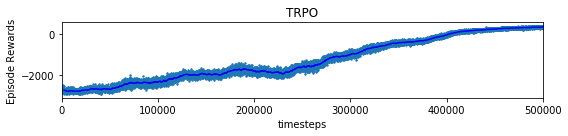

In [7]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "TRPO")
plt.show()

In [ ]:
obs = env.reset()
for i in range(199):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()